<a href="https://colab.research.google.com/github/Angshuman-nits/ML_Projects/blob/main/LoanRepayDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Decision_Tree_ Dataset.csv')

In [6]:
df.head()

,1,2,3,4,sum,Unnamed: 5
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [7]:
df.shape

(1000, 6)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   1           1000 non-null   int64 
 1   2           1000 non-null   int64 
 2   3           1000 non-null   int64 
 3   4           1000 non-null   int64 
 4   sum         1000 non-null   int64 
 5   Unnamed: 5  1000 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


In [9]:
#HENCE NO NULL VALUES ARE PRESENT

In [15]:
df.describe()

,1,2,3,4,sum
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,294.34300,12465.88400,528.042000,4027.011000,17315.280000
std,115.81539,1440.15617,259.796059,565.164179,1589.943875
min,100.00000,10005.00000,100.000000,3003.000000,13515.000000
25%,195.00000,11201.50000,302.000000,3545.000000,16073.750000
50%,289.50000,12450.00000,516.500000,4041.500000,17383.000000
75%,398.00000,13678.25000,753.500000,4507.000000,18595.250000
max,500.00000,14996.00000,997.000000,5000.000000,20737.000000


In [16]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [47]:
df.columns

Index(['1', '2', '3', '4', 'sum', 'Unnamed: 5'], dtype='object')

In [39]:
#to check duplicate data
df[df.duplicated()]

,1,2,3,4,sum,Unnamed: 5


hence no duplicate data is present

In [44]:
#to import label encoder to convert  yes and no to 1 and 0
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [48]:
df['Unnamed: 5']=le.fit_transform(df['Unnamed: 5'])

In [49]:
df.head()

,1,2,3,4,sum,Unnamed: 5
0,201,10018,250,3046,13515,1
1,205,10016,395,3044,13660,1
2,257,10129,109,3251,13746,1
3,246,10064,324,3137,13771,1
4,117,10115,496,3094,13822,1


hence yes=1 amd No=0

In [61]:
df.tail()

,1,2,3,4,sum,Unnamed: 5
995,413,14914,523,4683,20533,0
996,359,14423,927,4838,20547,0
997,316,14872,613,4760,20561,0
998,305,14926,897,4572,20700,0
999,168,14798,834,4937,20737,0


In [50]:
x=df.iloc[:,0:5]
y=df.iloc[:,5]

In [51]:
x.head()

,1,2,3,4,sum
0,201,10018,250,3046,13515
1,205,10016,395,3044,13660
2,257,10129,109,3251,13746
3,246,10064,324,3137,13771
4,117,10115,496,3094,13822


In [52]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Unnamed: 5, dtype: int64

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [71]:
#function to perform training with entropy
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [72]:
y_pred=clf_entropy.predict(x_test)
print(y_pred)

[1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0
 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1
 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1
 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0
 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1
 0 0 1 1]


In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy score is:",accuracy_score(y_test,y_pred))

Accuracy score is: 1.0


[[147   0]
 [  0 153]]


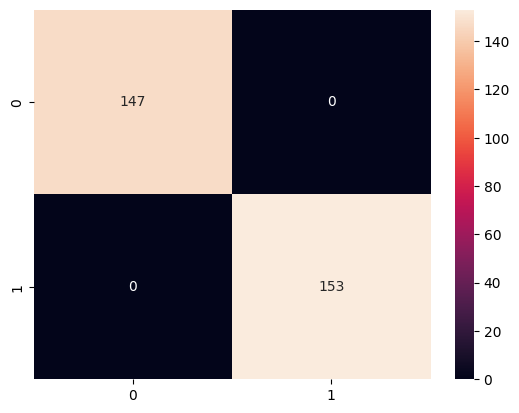

In [74]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True, fmt='d')
plt.show()

In [75]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       153

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

